In [3]:
%matplotlib inline
import sys; sys.path.insert(0, '../python/')
from helper import loadtxt
from matplotlib import pyplot as plt
import numpy as np


## Load detected rings and plot

size of the dots indicate the detected ring radius 

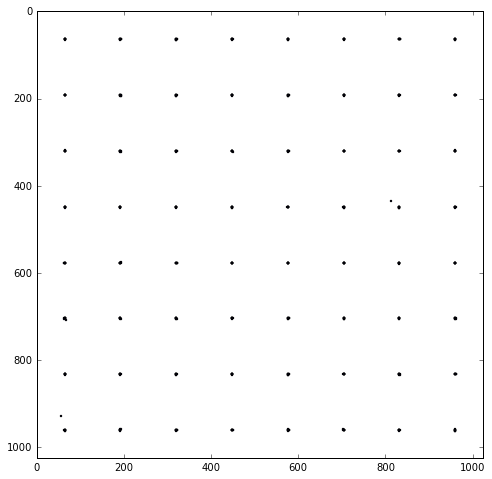

In [83]:
rings = loadtxt('../../upiv/output/ring_simu.txt')
pts = rings[:,:3]

fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(111)
axes.set_xlim(0,1024)
axes.set_ylim(1024,0)
for x,y,r in pts:
    axes.scatter(x, y, s=2)

## Generate Ring Pattern
assuming Gaussian noise background. Fuzzy ring is also Gaussian convoluted in radial direction.
Signal-to-noise ratio is taken from mean of all solid ring with half thickness.

    parameter noise variance is 1.
    parameter alpha is the seperation between signale and noise.


In [35]:
import numpy.random as rand

noise = 1.0
thickness = 6
rad = 15
samplesize = 128,128

def draw_circle(imgsize, rad, thickness=2):
    w, h = imgsize
    xx, yy = np.mgrid[:w, :h]
    circle = (xx - w/2)**2 + (yy - h/2)**2
    rmin, rmax = rad - thickness/2, rad + thickness/2
    return np.logical_and(circle <= rmax**2, circle >= rmin**2)

def draw_fuzzy_circle(imgsize, rad, thickness):
    width = 0.5 * thickness
    idx = np.arange(min(imgsize))
    kernel = np.exp(-(idx - rad)**2/(2*width**2))

    w, h = imgsize
    xx, yy = np.mgrid[:w, :h]
    circle = np.floor(np.sqrt((xx - w/2)**2 + (yy - h/2)**2))

    f = np.vectorize(lambda x: kernel[x])
    return f(circle)

def snr_ind(x):
    return 20 * np.log(x) / np.log(10)

def gen_pattern(alpha):
    background = rand.normal(0.0, noise, samplesize)

    fuzzy_circle = draw_fuzzy_circle(samplesize, rad, thickness)
    image = alpha * fuzzy_circle + background

    # ring pattern
    circle = draw_circle(samplesize, rad, 0.3*thickness)

    # signal noise ratio
    if 0:
        #snr = alpha * image[circle].max() / noise
        snr = image[circle].mean() / noise
    else:
        beta = 0.02
#         thred = image.mean() + beta * (image.max() - image.mean())
        thred = beta * image.max()
        print thred
        signal = image[np.logical_and(image>thred, circle)]
        snr = signal.mean()/noise
    
        image[np.logical_and(image>thred,circle)] = -50
    
    return image, snr, snr_ind(snr)

0.0900280753961
0.1	640  xxx   0   0.806 -1.87
0.0922050662511
0.2	640  xxx   0   0.956 -0.39
0.0820084500162
0.23	640  xxx   0   0.966 -0.30
0.0750062314642
0.25	640  xxx   0   1.004 0.04
0.073846155677
0.27	640  xxx   0   0.961 -0.34
0.0870848588171
0.3	640  xxx   0   0.925 -0.67
0.0768165082208
0.4	640  xxx   0   1.045 0.38
0.07107191029
0.5	640  xxx   0   1.024 0.21
0.0930196477684
0.6	640  xxx   0   1.028 0.24
0.0776642178021
0.7	640  xxx   0   1.242 1.88
0.0824255292888
0.8	640  xxx   0   1.146 1.19
0.0865123372286
0.9	640  xxx   0   1.197 1.56
0.0823505649811
1.0	640  xxx   0   1.302 2.29


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


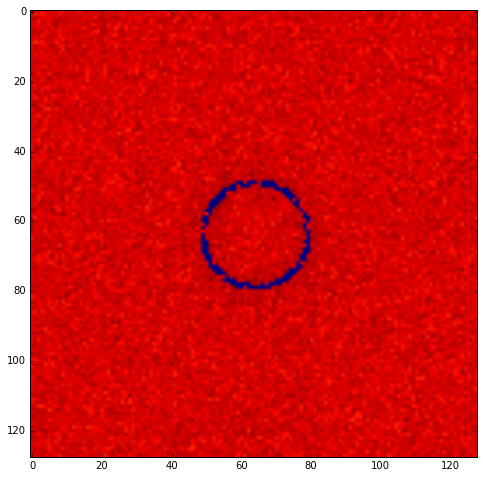

In [36]:
number=1

for alpha in [0.1, 0.2, 0.23, 0.25, 0.27, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:

    snr=0
    for _ in range(number):
        sample, snr_, _ = gen_pattern(alpha)
        snr += snr_
        
    print '%s\t640  xxx   0   %.3f %.2f' % (alpha, snr/number, snr_ind(snr/number))

fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(111)
axes.imshow(sample)